Name of Group Member:
1. 2440113194 - Didimus Adithya Bedu 
2. 2440113212 - Listiarini Hadirianti
3. 2440113231 - Aulia Nur Afifah
4. 2440114436 - Soraya Triutami Dewi

Link Video : https://youtu.be/bo2r-uBR0KU

# Analysis of Consumer Behavior Categories on Purchasing Activities, Case Studies in XXX Stores

This data collection helps businesses to better understand their customers and makes it easier for them to modify products according to the specific needs, behaviors, and concerns of different types of customers.

The data is taken from :
https://www.kaggle.com/imakash3011/customer-personality-analysis 

## TABLE OF CONTENT

- <a href='#1'>1. Load libraries and Data Overview</a>  

    - <a href='#1.1'>1.1. Load libraries</a> 
    - <a href='#1.2'>1.2. Data Overview</a> 
    
- <a href='#2'>2. Checking and Treating Missing Value</a> 

    - <a href='#2.1'>2.1. Checking Missing values</a> 
    - <a href='#2.2'>2.2. Treating Missing Values</a> 
    
- <a href='#3'>3. Data Exploration(EDA)</a>

- <a href='#4'>4. Visualization</a>

- <a href='#5'>5. Checking Outliers</a> 

- <a href='#6'>6. Correlation</a> 

- <a href='#7'>7. Conclusions</a> 


# <a id='1'>1. Load libraries and Data Overview</a> 

## <a id='1.1'>1.1. Load libraries</a> 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore') 

## <a id='1.2'>1.2. Data Overview</a> 

In [2]:
# Read the dataset
data = pd.read_csv("marketing_campaign.csv",sep="\t")
print(f"This dataset has {data.shape[0]} rows and {data.shape[1]} columns")

This dataset has 2240 rows and 29 columns


In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Dataset Description   

#### People

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income ( USD )
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

#### Products ( All in USD )

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

#### Promotion

* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

#### Place

* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month




In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

As we can see on info of the data :
* Income variable only has 2216 data while the others have 2240, meaning there is some missing data on Income variable

* Dt_Customer which indicating the date of customer's enrollment with the company has object data type when it should have datetime data type

# <a id='2'>2. Checking and Treating Missing Values</a> 

## <a id='2.1'>2.1. Checking Missing Values</a> 

In [6]:
#Checking the null values in the dataset
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

## <a id='2.2'>2.2. Treating Missing Values</a> 

In [7]:
missing_data = data['Income'].isnull().sum()/len(data['Income'])
print(f"There is {missing_data*100} % of data missing on Income variable.")

There is 1.0714285714285714 % of data missing on Income variable.


As we conclude above there really is a missing data on Income variable, but because the missing data is only 1% which is less than 20% we can just delete the missing row

In [8]:
print(f"The number of rows before removing the missing data {data.shape[0]}.")
data = data.dropna()
print(f"The number of rows after removing the missing data {data.shape[0]}.")

The number of rows before removing the missing data 2240.
The number of rows after removing the missing data 2216.


# <a id='3'>3. Data Exploration</a> 

Let's see at the data that we are going to be working with, First we can check whether the values of each variable is unique

In [9]:
data.nunique()

ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

We can see that "Z_CostContact" and "Z_Revenue" have same values in all rows, so we can drop them because they are not going to contribute anything 

In [10]:
data = data.drop(columns = ["Z_CostContact", "Z_Revenue"], axis = 1)

In [11]:
print("Total in each category in Marital_Status Column:\n", data["Marital_Status"].value_counts(), "\n")
print("Total in each category in Education Column:\n", data["Education"].value_counts())

Total in each category in Marital_Status Column:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total in each category in Education Column:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


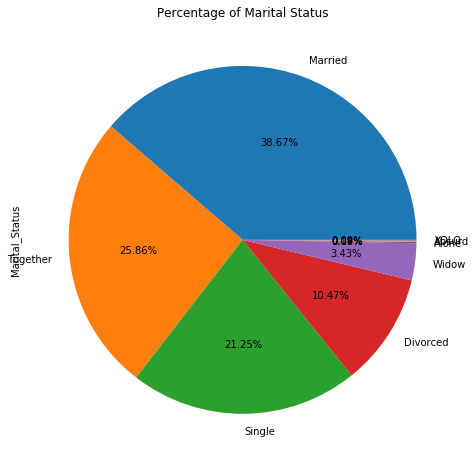

In [12]:
data["Marital_Status"].value_counts().plot.pie(autopct="%.2f%%",figsize = (8,8))
plt.title('Percentage of Marital Status')
plt.show()

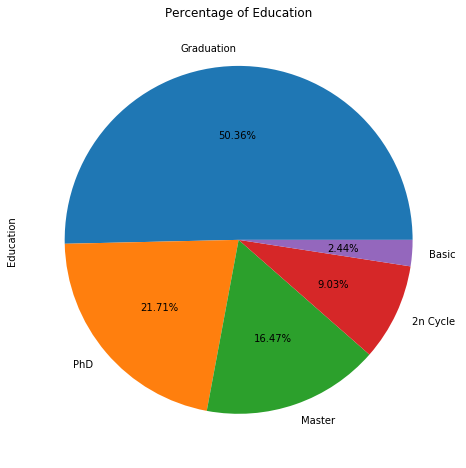

In [13]:
data["Education"].value_counts().plot.pie(autopct="%.2f%%",figsize = (8,8))
plt.title('Percentage of Education')
plt.show()

As we can see from above, there are many ambiguities in the data. Therefore we can group the data so that it is easier to draw conclusions from the data.

We are going to group **"Married"** and **"Together"** as **"Relationship"** and **anything else** as **"Single"**

and we also going to categorize the Education column into two categories: **Undergraduate** and **Postgraduate**

In [14]:
#Marital_Status
data["Marital_Status"]=data["Marital_Status"].replace({"Married":"Relationship", "Together":"Relationship", "Absurd":"Single", "Widow":"Single", "YOLO":"Single", "Divorced":"Single", "Alone":"Single"})

#Education
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Postgraduate", "Graduation":"Postgraduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

In [15]:
print("Total in each category in Marital_Status Column:\n", data["Marital_Status"].value_counts(), "\n")
print("Total in each category in Education Column:\n", data["Education"].value_counts())

Total in each category in Marital_Status Column:
 Relationship    1430
Single           786
Name: Marital_Status, dtype: int64 

Total in each category in Education Column:
 Postgraduate     2162
Undergraduate      54
Name: Education, dtype: int64


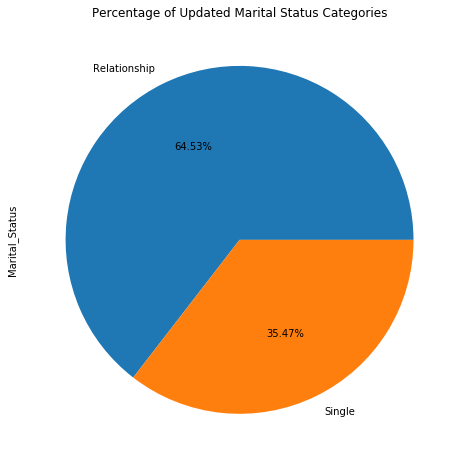

In [16]:
data["Marital_Status"].value_counts().plot.pie(autopct="%.2f%%",figsize = (8,8))
plt.title('Percentage of Updated Marital Status Categories')
plt.show()

**35.47% of the customer are single while 64.53% of the customer is in a relationship**

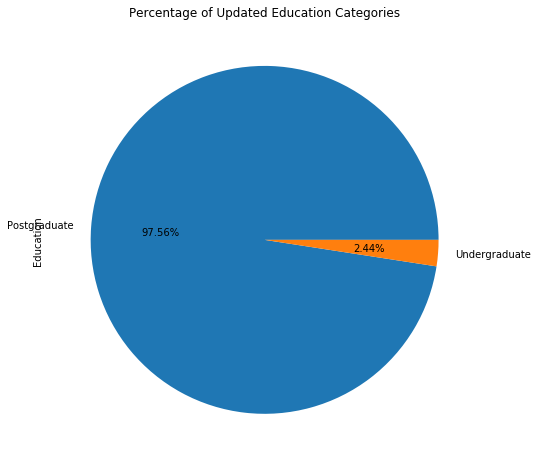

In [17]:
data["Education"].value_counts().plot.pie(autopct="%.2f%%",figsize = (8,8))
plt.title('Percentage of Updated Education Categories')
plt.show()

**More than 97% of the customers are Postgraduate and less than 3% are undergraduates.**

As we can see, now the data is more neatly categorized and can be understood more easily.

As a matter of fact, we can create some new variables to have a better understanding of our dataset. Hence, this is what we are going to do :
* Create **Customer_For** Variable indicating how long (days) the customer started shopping in the store.
* Create **Age** Variable indicating customer age by deducting today's date to the customer **Year_Birth**.
* Create **Spent** Variable indicating the total amount of money spent by the customer in two years period by summing all the amount of money spent by the customer in two years period.
* Create **Expenses** Variable indicating the total amount of money spent by the customer in two years period by summing all the amount of money spent by the customer in two years period.
* Create **Children** Variable indicating the number of children in customer household by summing **Kidhome** and **Teenhome**.
* Create **TotalAccpetedCmp** Variable indicating all the accepted complain.
* Create **NumTotalPurchases** Variable indicating all the number of purchases made.
* Create **Family_Size** Variable indicating the number of family members in customer household.
* Create **Is_Parent** Variable indicating the parenthood status of the customer.
* Create **Education** Variable indicating the level of education of the customer and further simplify the value.
* Dropping some redundant column.

Now, before we create the **Customer_For** variable we need to change the **Dt_Customer** into a datetime data type.

In [18]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
dates = []
for d in data["Dt_Customer"]:
    d = d.date()
    dates.append(d)
print(f"The newest customer enrolls on {max(dates)}.")
print(f"The oldest customer enrolls on {min(dates)}.")

The newest customer enrolls on 2014-12-06.
The oldest customer enrolls on 2012-01-08.


It can be seen that the most recent customer was in 2014, we can conclude that **this is an old data and we can expect to see some outliers on the Age variable later.**

In [19]:
days = []
newest_customer = max(dates)
for d in dates :
    temp = newest_customer - d
    days.append(temp)
data["Customer_For"] = days

Because the **Customer_For** variable is taken from difference of dates which is a timedelta data type we have to change the Data type to numerical

In [20]:
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

Now we can create the rest of the variable

In [21]:
#Age
data["Age"] = 2021-data["Year_Birth"]

#Expenses
data["Expenses"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#TotalAccpetedCmp
data['TotalAcceptedCmp'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5'] + data['Response']

#NumTotalPurchases
data['NumTotalPurchases'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases'] + data['NumDealsPurchases']

#Children
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Family_Size
data["Family_Size"] = data["Marital_Status"].replace({"Single": 1, "Relationship":2})+ data["Children"]

#Is_Parent
parent = []
for i in range (2240) :
    try:
        if (data.Children[i] > 0) : parent.append(1)
        else : parent.append(0)
    except : continue
data["Is_Parent"] = parent

Now we are going to change some of the column names so it will be easier to understand 

and we are also going to remove some columns to reduce the dimension and complexity of the dataset and makes the dataset easier to work with.

In [22]:
#Changing some columns name for clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping redundant columns
to_drop = ["ID", "Year_Birth", "Dt_Customer", "Recency", "AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" ,"Complain", "AcceptedCmp4","AcceptedCmp5", "Response" , "Kidhome", "Teenhome"]
data = data.drop(to_drop, axis=1)

In [23]:
data.head()

,Education,Marital_Status,Income,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,...,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Expenses,TotalAcceptedCmp,NumTotalPurchases,Children,Family_Size,Is_Parent
0,Postgraduate,Single,58138.0,635,88,546,172,88,88,3,...,4,7,83894400000000000,64,1617,1,25,0,1,0
1,Postgraduate,Single,46344.0,11,1,6,2,1,6,2,...,2,5,10800000000000000,67,27,0,6,2,3,1
2,Postgraduate,Relationship,71613.0,426,49,127,111,21,42,1,...,10,4,40780800000000000,56,776,0,21,0,2,0
3,Postgraduate,Relationship,26646.0,11,4,20,10,3,5,2,...,4,6,5616000000000000,37,53,0,8,1,3,1
4,Postgraduate,Relationship,58293.0,173,43,118,46,27,15,5,...,6,5,27734400000000000,40,422,0,19,1,3,1


We can see that the data is easier to understand, now we can move on to visualizing the data.

# <a id='4'>4. Visualization</a> 

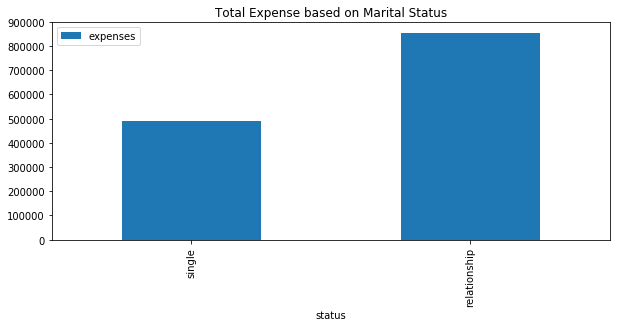

In [24]:
single = data.loc[data["Marital_Status"] == "Single"]["Expenses"].sum()
relationship = data.loc[data["Marital_Status"] == "Relationship"]["Expenses"].sum()
marital = pd.DataFrame({"status":["single", "relationship"], "expenses":[single, relationship]})
marital.plot.bar(x = 'status', y = 'expenses',figsize = (10,4), title = "Total Expense based on Marital Status")
plt.show()

**Customers that are in relationship spend more money rather than single customers.**

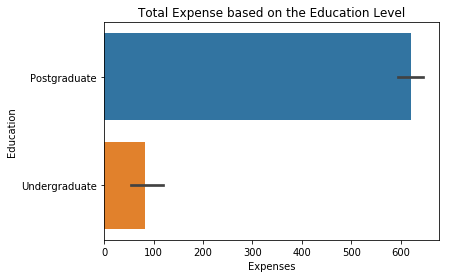

In [25]:
sns.barplot(x = data['Expenses'],y = data['Education'])
plt.title('Total Expense based on the Education Level')
plt.show()

**Undergraduate customers spend less than 1/6 of what postgraduate customers spend.**

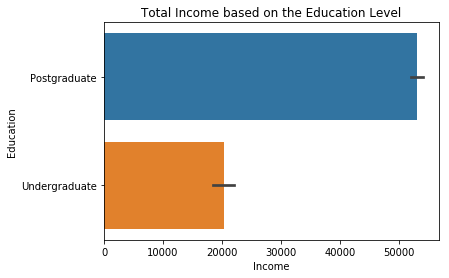

In [26]:
sns.barplot(x = data['Income'],y = data['Education'])
plt.title('Total Income based on the Education Level')
plt.show()

**Postgraduate Customers have more than double of the income of Undergraduate Customers.**

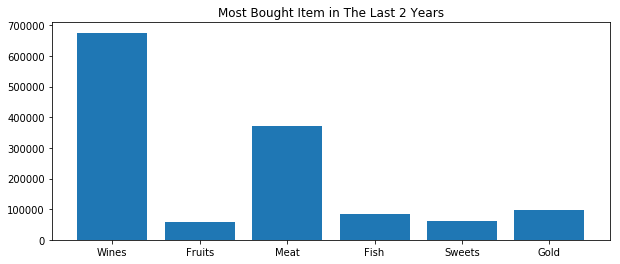

In [27]:
To_Plot = ["Wines", "Fruits", "Meat", "Fish", "Sweets", "Gold"].copy()
item = data[To_Plot].copy()
Bought = []
for t in To_Plot:
    Bought.append(item[t].sum())
plt.rcParams["figure.figsize"] = (10,4)
plot_item = plt.bar(To_Plot, Bought)
plt.title('Most Bought Item in The Last 2 Years')
plt.show()

**Wines are the most desireable product in the store followed by meat.**

Grouping Customer by income :
* Low -> Income < 51381
* Medium -> Income > 51381 but Income < 68522
* High -> Income > 68522

In [28]:
# low = < 51381
# med = > 51381 but < 68522
# high > 68522
low = data.loc[data["Income"] < 51381]
lowplot = low[To_Plot].copy()
lBought = []
for t in To_Plot:
    lBought.append(lowplot[t].sum())

med = data.loc[(data["Income"] > 51381) & (data["Income"] < 68522)]
medplot = med[To_Plot].copy()
mBought = []
for t in To_Plot:
    mBought.append(medplot[t].sum())
    
hi = data.loc[(data["Income"] > 68522)]
hiplot = hi[To_Plot].copy()
hBought = []
for t in To_Plot:
    hBought.append(hiplot[t].sum())

In [ ]:
dfitems = pd.DataFrame({'Product':To_Plot, 'Bought':Bought})
dflow = pd.DataFrame({'Product':To_Plot, 'Bought':lBought})
dfmed = pd.DataFrame({'Product':To_Plot, 'Bought':mBought})
dfhi = pd.DataFrame({'Product':To_Plot, 'Bought':hBought})

**Low-Income Group**

In [30]:
print("Most to Less Purchased Product on Low-Income Group")
dflow['Percentage'] = ((dflow['Bought'] / dflow['Bought'].sum())*100).round(2)
dlow = dflow.sort_values(by='Bought', ascending=False)
display(dlow)

Most to Less Purchased Product on Low-Income Group


,Product,Bought,Percentage
0,Wines,81091,46.78
2,Meat,39281,22.66
5,Gold,24897,14.36
3,Fish,12328,7.11
4,Sweets,8018,4.63
1,Fruits,7736,4.46


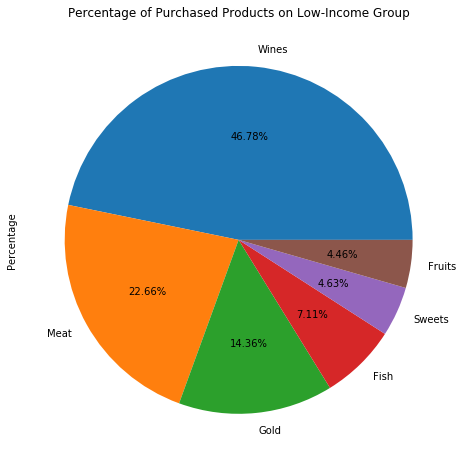

In [31]:
dlow["Percentage"].plot.pie(labels=dlow["Product"],autopct="%.2f%%",figsize = (8,8))
plt.title("Percentage of Purchased Products on Low-Income Group")
plt.show()

* **The most purchased product of low income customers is wine.** 
* **They spend almost half of their spending for wine.** 
* **They spend for gold is more than 10% of their total spending.** 
* **The least purchased product of low-income group is fruit.**

 **Medium-Income Group**

In [32]:
print("Most to Less Purchased Product on Medium-Income Group")
dfmed['Percentage'] = ((dfmed['Bought'] / dfmed['Bought'].sum())*100).round(2)
dmed = dfmed.sort_values(by='Bought', ascending=False)
display(dmed)

Most to Less Purchased Product on Medium-Income Group


,Product,Bought,Percentage
0,Wines,243336,57.97
2,Meat,89244,21.26
5,Gold,32476,7.74
3,Fish,21918,5.22
1,Fruits,16989,4.05
4,Sweets,15826,3.77


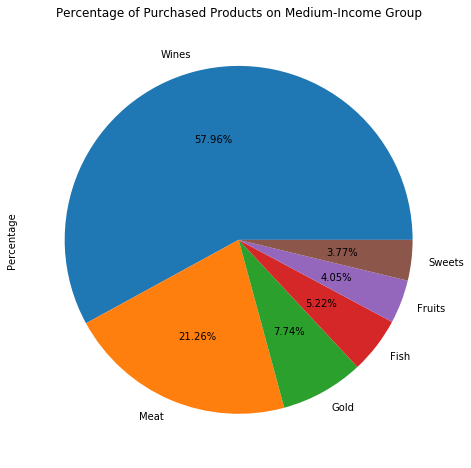

In [33]:
dmed["Percentage"].plot.pie(labels=dmed["Product"],autopct="%.2f%%",figsize = (8,8))
plt.title("Percentage of Purchased Products on Medium-Income Group")
plt.show()

* **The most purchased product of medium-income customers is wine.** 
* **They spend more than a half of what they spend for wine.**
* **They spend for gold is less than 10% of their total spending.** 
* **The least purchased product of medium-income group is sweets.**

**High-Income Group**

In [34]:
print("Most to Less Purchased Product on High-Income Group")
dfhi['Percentage'] = ((dfhi['Bought'] / dfhi['Bought'].sum())*100).round(2)
dhi = dfhi.sort_values(by='Bought', ascending=False)
display(dhi)

Most to Less Purchased Product on High-Income Group


,Product,Bought,Percentage
0,Wines,351656,46.75
2,Meat,241538,32.11
3,Fish,49159,6.54
5,Gold,40054,5.33
4,Sweets,36052,4.79
1,Fruits,33680,4.48


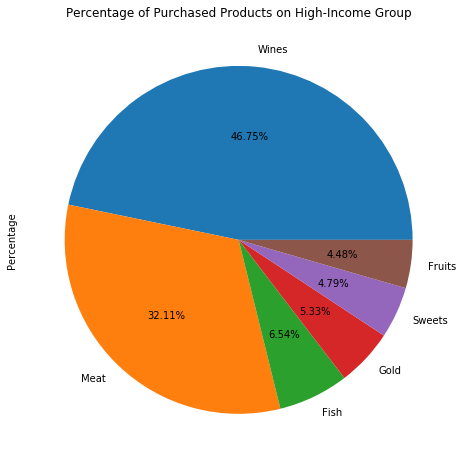

In [35]:
dhi["Percentage"].plot.pie(labels=dhi["Product"],autopct="%.2f%%",figsize = (8,8))
plt.title("Percentage of Purchased Products on High-Income Group")
plt.show()

* **The most purchased product of high-income customers is wine.**
* **They spend almost a half of what they spend for wine.**
* **They spend just 5% of their total spending for gold.**
* **The least purchased product of high-income group is fruit.**

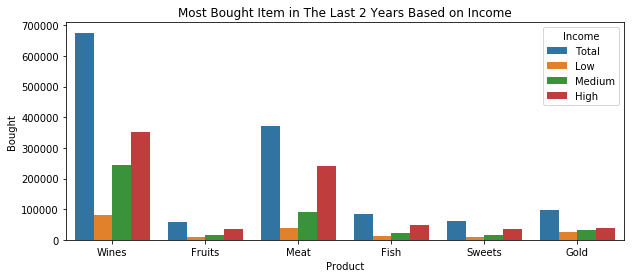

In [36]:
dfitems['Income'] = "Total"
dflow['Income'] = "Low"
dfmed['Income'] = "Medium"
dfhi['Income'] = "High"
res = pd.concat([dfitems,dflow,dfmed,dfhi])
sns.barplot(x='Product', y = 'Bought', data = res, hue = 'Income')
plt.title('Most Bought Item in The Last 2 Years Based on Income')
plt.show()

* **All groups spend the most money on wines.**
* **Low and Medium Income groups spend more on gold rather than Fish, whereas High Income Group spend more on Fish rather than gold.**
* **All groups have low interest or needs to bought fruits and sweets.**

# <a id='5'>5. Checking Outliers</a> 

In [37]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2216.0,5.224725e+04,2.517308e+04,1730.0,3.530300e+04,5.138150e+04,6.852200e+04,6.666660e+05
Wines,2216.0,3.050916e+02,3.373279e+02,0.0,2.400000e+01,1.745000e+02,5.050000e+02,1.493000e+03
Fruits,2216.0,2.635605e+01,3.979392e+01,0.0,2.000000e+00,8.000000e+00,3.300000e+01,1.990000e+02
Meat,2216.0,1.669959e+02,2.242833e+02,0.0,1.600000e+01,6.800000e+01,2.322500e+02,1.725000e+03
Fish,2216.0,3.763764e+01,5.475208e+01,0.0,3.000000e+00,1.200000e+01,5.000000e+01,2.590000e+02
Sweets,2216.0,2.702888e+01,4.107205e+01,0.0,1.000000e+00,8.000000e+00,3.300000e+01,2.620000e+02
Gold,2216.0,4.396525e+01,5.181541e+01,0.0,9.000000e+00,2.450000e+01,5.600000e+01,3.210000e+02
NumDealsPurchases,2216.0,2.323556e+00,1.923716e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,1.500000e+01
NumWebPurchases,2216.0,4.085289e+00,2.740951e+00,0.0,2.000000e+00,4.000000e+00,6.000000e+00,2.700000e+01
NumCatalogPurchases,2216.0,2.671029e+00,2.926734e+00,0.0,0.000000e+00,2.000000e+00,4.000000e+00,2.800000e+01


We can see on the Age variable the max value is 128 because the data is old.

we can check whether there is other outliers. we have to plot the data to get a better view of the data

Income             AxesSubplot(0.125,0.816017;0.227941x0.0639831)
Customer_For    AxesSubplot(0.398529,0.816017;0.227941x0.0639831)
Age             AxesSubplot(0.672059,0.816017;0.227941x0.0639831)
Expenses           AxesSubplot(0.125,0.739237;0.227941x0.0639831)
Is_Parent       AxesSubplot(0.398529,0.739237;0.227941x0.0639831)
dtype: object

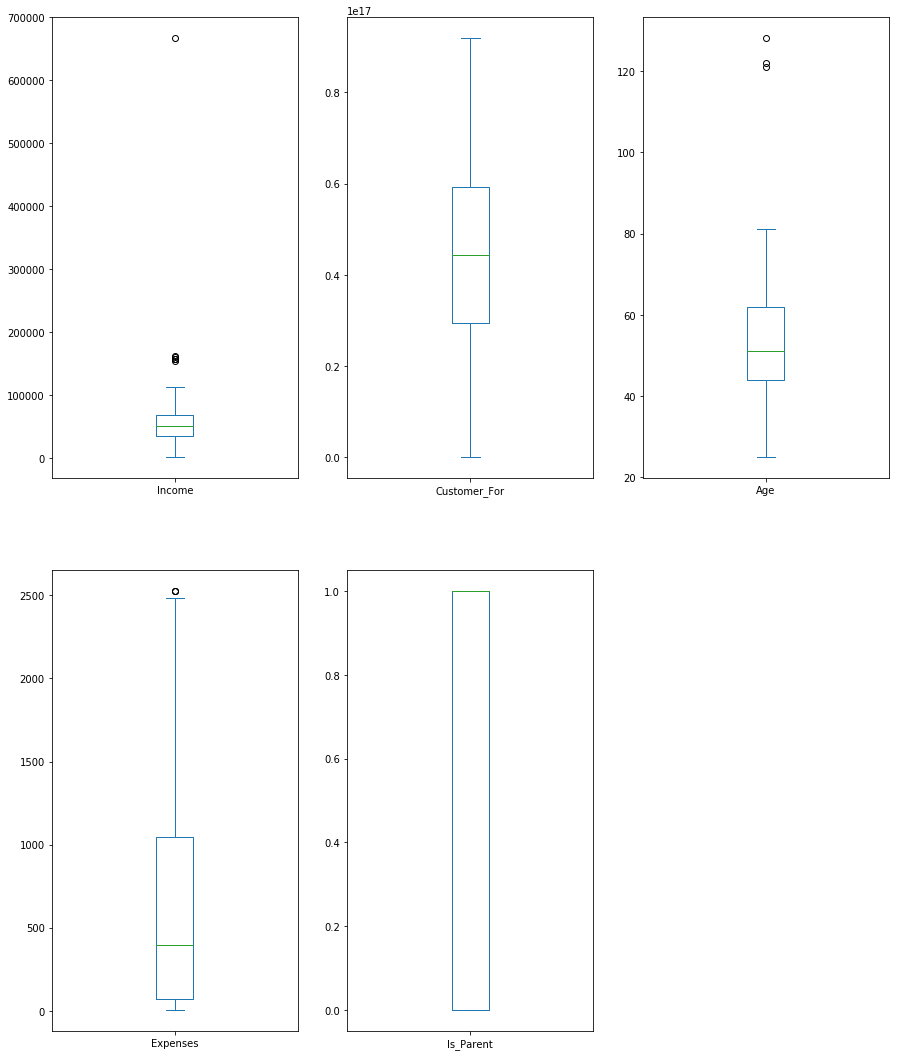

In [38]:
To_Plot = [ "Income", "Customer_For", "Age", "Expenses", "Is_Parent"]
temp_data = data[To_Plot].copy()
#Box and Whisker plot to visualize the distribution of all atributes
temp_data.plot(kind= 'box' , subplots=True, layout=(10,3), sharex=False, sharey=False, figsize=(15,100))

We can see there is outliers on Age variable and on Income variable

So now what we can do is we can remove the outliers so that our data become more balanced

In [39]:
print(f"The total number of rows before removing the outliers are {data.shape[0]}")
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print(f"The total number of rows after removing the outliers are {data.shape[0]}")

The total number of rows before removing the outliers are 2216
The total number of rows after removing the outliers are 2212


# <a id='6'>6. Correlation</a> 

In [40]:
corr_matrix_pearson = data.corr(method='pearson')
corr_matrix_pearson

,Income,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Expenses,TotalAcceptedCmp,NumTotalPurchases,Children,Family_Size,Is_Parent
Income,1.000000,0.688209,0.507354,0.692279,0.520040,0.523599,0.388299,-0.108207,0.459265,0.696589,0.631424,-0.650257,-0.027892,0.199977,0.792740,0.343150,0.670413,-0.343529,-0.286638,-0.403132
Wines,0.688209,1.000000,0.385844,0.568081,0.396915,0.389583,0.391461,0.009117,0.553663,0.634237,0.640219,-0.321616,0.148745,0.164615,0.892996,0.487026,0.713520,-0.353356,-0.296702,-0.341994
Fruits,0.507354,0.385844,1.000000,0.546740,0.593038,0.571474,0.393459,-0.134191,0.302301,0.485611,0.459875,-0.417741,0.059828,0.013447,0.612129,0.167838,0.454582,-0.395161,-0.341414,-0.410657
Meat,0.692279,0.568081,0.546740,1.000000,0.572986,0.534624,0.357556,-0.121128,0.306841,0.733787,0.486349,-0.539194,0.071381,0.033622,0.845543,0.328465,0.565406,-0.504176,-0.429948,-0.574147
Fish,0.520040,0.396915,0.593038,0.572986,1.000000,0.583484,0.426299,-0.143147,0.299428,0.532241,0.457885,-0.446151,0.078042,0.041154,0.641884,0.176770,0.468260,-0.427482,-0.363522,-0.449596
Sweets,0.523599,0.389583,0.571474,0.534624,0.583484,1.000000,0.356754,-0.121395,0.333608,0.494623,0.455150,-0.422289,0.076345,0.021516,0.606652,0.199338,0.470420,-0.389152,-0.330705,-0.402064
Gold,0.388299,0.391461,0.393459,0.357556,0.426299,0.356754,1.000000,0.053047,0.407873,0.441656,0.390693,-0.245973,0.145632,0.059779,0.527101,0.205289,0.493199,-0.267776,-0.235826,-0.245380
NumDealsPurchases,-0.108207,0.009117,-0.134191,-0.121128,-0.143147,-0.121395,0.053047,1.000000,0.241228,-0.012015,0.065635,0.345623,0.199994,0.066156,-0.065571,-0.094298,0.360314,0.436072,0.373986,0.388593
NumWebPurchases,0.459265,0.553663,0.302301,0.306841,0.299428,0.333608,0.407873,0.241228,1.000000,0.386539,0.515756,-0.051589,0.171834,0.162265,0.529095,0.210083,0.784023,-0.148938,-0.121879,-0.073473
NumCatalogPurchases,0.696589,0.634237,0.485611,0.733787,0.532241,0.494623,0.441656,-0.012015,0.386539,1.000000,0.517887,-0.522023,0.091391,0.125856,0.780250,0.351099,0.736219,-0.443199,-0.372319,-0.452734


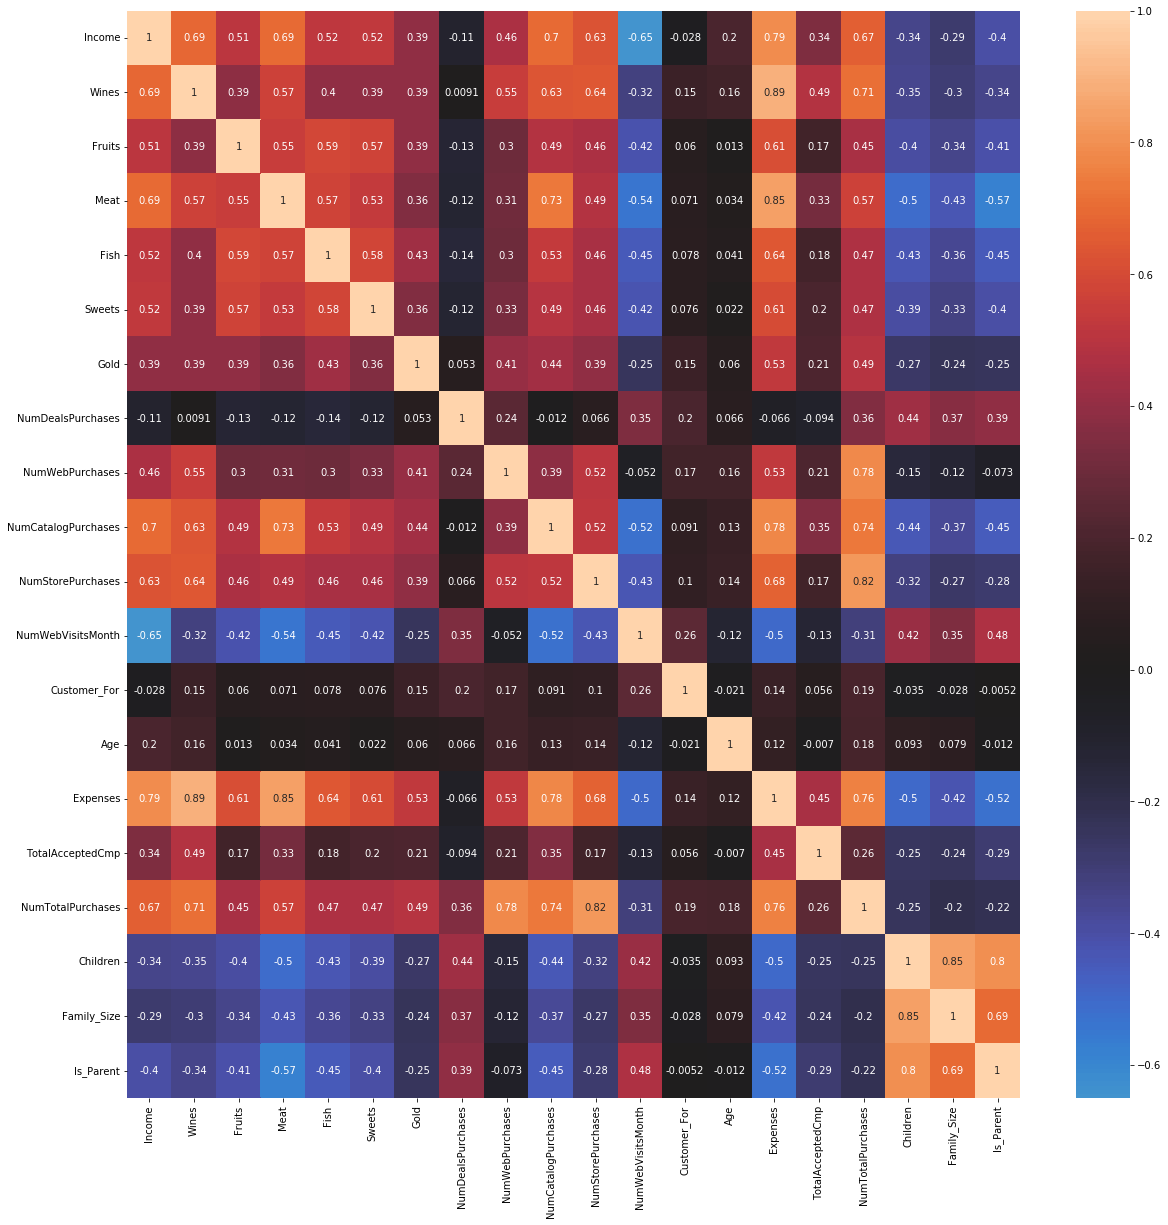

In [41]:
plt.figure(figsize=(20,20))  
sns.heatmap(corr_matrix_pearson,center=0, annot = True)
plt.show()

There are 2 types of correlation :
* **Positive correlation**, a positive correlation happen when the correlation coefficient is greather than 0. It signifies that both variables move in the **same direction**, when one variable moves higher or lower, the other variable moves in the same direction with the same magnitude.
* **Negative correlation**, a negative correlation happen when the correlation coefficient is lower than 0. It signifies that both variables move in the **opposite dirrection**, when one variable moves higher or lower, the other variable moves in the opposite dirrection.

As we can see from the heatmap, we can conclude that,

Strong Correlation :
* Income x Expenses (0.79) - implying that the more money customer earn, the more customer will spend.
* Income x NumTotalPurchases (0.67) - implying that the more money customer earn, more likely customer will purchase item in the store
* Expenses x Wines (0.89) - implying that Customers with high expenses tend to buy more wine.
* Expenses x Meat (0.85) - implying that Customers with high expenses tend to buy more meat.
* Expenses x NumCatalogPurchases (0.78) - implying high spending customers tend to buy items from catalog.

Positive Correlation :
* Expenses x TotalAcceptedComp - implying that the more customers spend, the more likely customer complaint will be accepted
* Children x NumDealsPurchases (0.44) - implying that the customer who had children is more likely to buy things that are on discount

Negative Correlation :
* Children x Expenses (-0.5) - implying that the more children customer had, the less likely customer will spend money on the store
* Children x NumTotalPurchases (-0.25) - implying that customers children are less likely to purchase item
* Expenses x NumWebVisitsMonth (-0.5) - implying that high spending customers are less likely to visit store website
* Income x NumWebVisitsMonth (-0.65) - implying that high income customers are less likely to visit store website
* Income x NumDealsPurchases (-0.11) - implying that high income customers are less likely to buy items that are on discount


# <a id='7'>7. Conclusions</a> 

High Income Customers :
* tends to spend more and purchase more
* less likely to buy items that are on discount
* less likely to visit store website

Customer with Children :
* tends to spend less and purchase less
* more likely to buy items that are on discount

Big Spender / High Expense Customer :
* tend to buy more wine and meat
* tend to buy items from catalog
* less likely to visit store website